In [326]:
import pandas as pd
import numpy as np
import json
from twitter_api import get_data
import requests
import os
import matplotlib.pyplot as plt
% matplotlib inline


# Gather

In [327]:
archive_df=pd.read_csv("twitter-archive-enhanced.csv")


In [328]:

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response


<Response [200]>

In [329]:
with open(os.path.join('./', url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    

In [330]:
image_pred_df=pd.read_csv('image-predictions.tsv', sep='\t')

In [331]:
if not os.path.exists('tweet_json.txt'):
    get_data(archive_df, 'tweet_json.txt')

In [332]:
#to load the json.txt data into a dataframe , i set lines to be true so that it is read the file as a json object per line.
# i set the encoding to be 'utf-8' because it was mentioned in the gathering lesson
with open('tweet_json.txt') as file:
    api_df = pd.read_json(file, lines= True, encoding = 'utf-8')

# Assessing
## Quality issues
- the columns doggo, floofer, puppo

# Twitter Archive data

In [333]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- There are 181 retweets and 78 replies

In [334]:
pd.set_option("display.max_colwidth", -1)
archive_df.head(34)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [335]:
pd.set_option("display.max_colwidth", -1)
archive_df.text.head(1)

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
Name: text, dtype: object

In [336]:
pd.set_option("display.max_colwidth", -1)
archive_df.expanded_urls.head(1)

0    https://twitter.com/dog_rates/status/892420643555336193/photo/1
Name: expanded_urls, dtype: object

In [337]:
pd.set_option("display.max_colwidth", -1)
archive_df.loc[archive_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

- The rating and 

In [338]:
archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [339]:
pd.set_option("display.max_colwidth", -1)
archive_df.timestamp.unique()

array(['2017-08-01 16:23:56 +0000', '2017-08-01 00:17:27 +0000',
       '2017-07-31 00:18:03 +0000', ..., '2015-11-15 23:21:54 +0000',
       '2015-11-15 23:05:30 +0000', '2015-11-15 22:32:08 +0000'], dtype=object)

In [340]:
#print(df1['expanded_urls'].str.findall(r'(?:(?<=\s)|(?<=^))@.*?(?=\s|$)'))
pd.set_option("display.max_colwidth", -1)
archive_df.expanded_urls.duplicated().sum()

137

- There are 137 duplicated url

In [341]:
archive_df['rating_numerator'].describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [342]:
archive_df['rating_denominator'].describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

- Max should only be 10 

In [343]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [344]:
#df1.name.value_counts()

- the type stamp should be datetime type


In [345]:
archive_df.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [346]:
archive_df.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [347]:
archive_df.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [348]:
archive_df.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [349]:
archive_df.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [350]:
archive_df.duplicated().sum()

0

In [351]:
archive_df.tweet_id.duplicated().sum()

0

# Image Predictions

### Observations:
- p1_conf is always greater than p2_conf and p3_conf

In [352]:
pd.set_option("display.max_colwidth", -1)
image_pred_df.head(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [353]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [354]:
x=image_pred_df[image_pred_df.tweet_id==886267009285017600]
x.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [355]:
image_pred_df.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

- Column names are not clear / understandable

# Twitter API data

In [356]:
api_df.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",35520,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,NaN,NaN,NaN,NaN,7509,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'Adoptable Dogs ➡️', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/4W7xbIw5dg', 'entities': {'url': {'urls': [{'url': 'https://t.co/4W7xbIw5dg', 'expanded_url': 'https://campsite.bio/weratedogs', 'display_url': 'campsite.bio/weratedogs', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 8868659, 'friends_count': 18, 'listed_count': 5914, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 145984, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 12954, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1311690208509747200/KngeU1O9_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1311690208509747200/KngeU1O9_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1591077312', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://

- The created_at column should be split into Date and Time
- quoted_status , quotes_status_id, quotes_status_id_st and quoted_status_permalink are unnecessary

In [357]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [358]:
api_df.describe()


,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2331.000000,0.0,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2197.0,2197.0,2.600000e+01,2.600000e+01,2331.000000
mean,NaN,NaN,7423.882883,NaN,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2642.046332
std,NaN,NaN,11527.382774,NaN,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4468.058926
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,1.000000
25%,NaN,NaN,1291.500000,NaN,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,536.000000
50%,NaN,NaN,3224.000000,NaN,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1236.000000
75%,NaN,NaN,9082.500000,NaN,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3066.500000
max,NaN,NaN,153238.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,75917.000000


### Observations
- There are 77 reply and 163 retweet and 26 quoted status which are unnecessary
- geo, id_str, contributors,coordinates are unnecessary
- some entries here aren't related to dogs
- some columns are repeated
- There are a lot of None and NaN values throughout the dataset
- some column names are not clear enough and hard to understand.


# Cleaning Data

## Tidiness issues:
- delete any column that has "retweeted" and "reply" in archive_df
- delete quoted_status , quoted_status_id, quoted_status_id_str ,quoted_status_permalink, in_reply_to_screen_name , in_reply_to_status_id ,in_reply_to_status_id_str  ,in_reply_to_user_id ,in_reply_to_user_id_str, contributors ,coordinates, id_str, geo in api_df
- change column name of : p1, p1_conf, p1_dog



## Quality issues:
### in archive_df:
- converst the data type of timestamp from string to datatime & tweet_id to string
- Remove the duplicated expanded_urls
- Remove NaNs from expanded_urls
- Remove rating_num that are more than 15 and less than 10
- Remove rating_denominator that are not equal 10
- Remove the rows that are not related to dogs
### in image_pred_df:
- delete NaN rows in jpg_url
- combine puppo, pupper, floofer, doggo into 1 column called dogs_stages
### in api_df:
- covert id column type into string

## Overall
- combining all the dataframes together 
- Delete unnecessary colummns


In [359]:
archive_clean=archive_df.copy()

In [360]:
image_pred_clean=image_pred_df.copy()

In [361]:
api_clean=api_df.copy()

In [362]:
#new_df = all_df['City'][all_df['City'] == "None"]

## Define
### for archive_df
- delete any column that has "retweeted" and "reply" in df1

## Code

In [363]:
archive_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

In [364]:
#archive_clean=archive_clean.drop(columns=[], inplace=True, axis=1)

## Test

In [365]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


## Define
- delete quoted_status , quoted_status_id, quoted_status_id_str ,quoted_status_permalink, in_reply_to_screen_name , in_reply_to_status_id ,in_reply_to_status_id_str  ,in_reply_to_user_id ,in_reply_to_user_id_str, contributors ,coordinates, id_str, geo in api_df


## Code

In [366]:
api_clean.drop(columns=['quoted_status','quoted_status_id','quoted_status_id_str','quoted_status_permalink','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','contributors','coordinates','id_str','retweeted_status','geo','place'], inplace=True)

# Test

In [367]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 17 columns):
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
id                               2331 non-null int64
is_quote_status                  2331 non-null bool
lang                             2331 non-null object
possibly_sensitive               2197 non-null float64
possibly_sensitive_appealable    2197 non-null float64
retweet_count                    2331 non-null int64
retweeted                        2331 non-null bool
source                           2331 non-null object
truncated                        2331 non-null bool
user                          

## Define
- The timestamp column is a string so we should convert it into datetime

# Code

In [368]:
archive_clean['timestamp']= pd.to_datetime(archive_clean['timestamp'])

# Test

In [369]:
archive_clean.timestamp.dtype

dtype('<M8[ns]')

# Define
- There are 137 duplicated in expanded_urls in df1 that should be removed


In [370]:
archive_clean.expanded_urls.duplicated().sum()

137

## Code


In [371]:
archive_clean.expanded_urls.drop_duplicates(keep='first',inplace=True)

# Test

In [372]:
archive_clean.expanded_urls.duplicated().sum()

0

In [373]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 219.9+ KB


# Define
- change the max number in rating_denominators in df1 from 170 to 10 ,bec it should only be 10

In [374]:
archive_clean.rating_denominator.describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

# Code

In [375]:
rating_den=archive_clean.loc[archive_df['rating_denominator'] != 10]
rating_den

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None


In [376]:
#archive_df.drop([archive_df.index[313] , archive_df.index[342],archive_df.index[433], archive_df.index[516],archive_df.index[784],archive_df.index[902],archive_df.index[1068],archive_df.index[1120],archive_df.index[1165],archive_df.index[1202],archive_df.index[1228],archive_df.index[1254],archive_df.index[1274],archive_df.index[1351],archive_df.index[1433],archive_df.index[1598],archive_df.index[1634],archive_df.index[1635],archive_df.index[1662],archive_df.index[1663],archive_df.index[1779],archive_df.index[1843],archive_df.index[2335]], inplace=True)

In [377]:
archive_clean=archive_clean.loc[~(archive_clean['rating_denominator'] != 10)]

# Test
- As shown below there are 23 entries that were removed (for rating_denominators !=10)

In [378]:
archive_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

In [379]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2333 non-null int64
timestamp             2333 non-null datetime64[ns]
source                2333 non-null object
text                  2333 non-null object
expanded_urls         2278 non-null object
rating_numerator      2333 non-null int64
rating_denominator    2333 non-null int64
name                  2333 non-null object
doggo                 2333 non-null object
floofer               2333 non-null object
pupper                2333 non-null object
puppo                 2333 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 236.9+ KB


# Define
- remove values in rating_numerator column in df1 which are less than 10 and more than 15

In [380]:
archive_clean.rating_numerator.describe()

count    2333.000000
mean     12.237462  
std      41.022472  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

## Code

In [381]:
archive_clean=archive_clean.loc[~(archive_clean['rating_numerator'] < 10)] # (archive_df['rating_numerator'] > 15)]

In [382]:
archive_clean=archive_clean.loc[~(archive_clean['rating_numerator'] > 15)] 

## Test

In [383]:
archive_clean.rating_numerator.describe()

count    1889.000000
mean     11.512970  
std      1.137741   
min      10.000000  
25%      11.000000  
50%      12.000000  
75%      12.000000  
max      15.000000  
Name: rating_numerator, dtype: float64

In [384]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1889 entries, 0 to 2350
Data columns (total 12 columns):
tweet_id              1889 non-null int64
timestamp             1889 non-null datetime64[ns]
source                1889 non-null object
text                  1889 non-null object
expanded_urls         1847 non-null object
rating_numerator      1889 non-null int64
rating_denominator    1889 non-null int64
name                  1889 non-null object
doggo                 1889 non-null object
floofer               1889 non-null object
pupper                1889 non-null object
puppo                 1889 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 191.9+ KB


# Define
- convert tweet_id in archive_df and id column in api_df into object (string) data type

# Code

In [385]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].apply(str)

In [386]:
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].apply(str)

In [387]:
api_clean['id'] = api_clean['id'].apply(str)

# Test

In [388]:
archive_clean.tweet_id.dtype

dtype('O')

In [389]:
archive_clean.tweet_id.dtype

dtype('O')

In [390]:
api_clean.id.dtype

dtype('O')

# Define

- Delete the Nan Values in expanded_urls

In [391]:
archive_clean.expanded_urls.isnull().sum()

42

## Code

In [392]:
#archive_df=archive_df.expanded_urls.isnull()
archive_clean=archive_clean.loc[~(archive_clean.expanded_urls.isnull())] 

## Test

In [393]:
archive_clean.expanded_urls.isnull().sum()

0

In [394]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 2350
Data columns (total 12 columns):
tweet_id              1847 non-null object
timestamp             1847 non-null datetime64[ns]
source                1847 non-null object
text                  1847 non-null object
expanded_urls         1847 non-null object
rating_numerator      1847 non-null int64
rating_denominator    1847 non-null int64
name                  1847 non-null object
doggo                 1847 non-null object
floofer               1847 non-null object
pupper                1847 non-null object
puppo                 1847 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 187.6+ KB


## Define
- put doggo, pupper, floofer and puppo columns into one column

## Code

In [395]:
archive_clean.iloc[:, -4:  ] = archive_clean.iloc[:, -4:  ].replace('None','')

In [396]:
archive_clean['dog_stage'] = archive_clean['doggo'] +archive_clean['floofer']+archive_clean['pupper']+ archive_clean['puppo'] 
#archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)

In [397]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 2350
Data columns (total 13 columns):
tweet_id              1847 non-null object
timestamp             1847 non-null datetime64[ns]
source                1847 non-null object
text                  1847 non-null object
expanded_urls         1847 non-null object
rating_numerator      1847 non-null int64
rating_denominator    1847 non-null int64
name                  1847 non-null object
doggo                 1847 non-null object
floofer               1847 non-null object
pupper                1847 non-null object
puppo                 1847 non-null object
dog_stage             1847 non-null object
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 202.0+ KB


In [398]:
archive_clean.dog_stage.value_counts()

                1522
pupper          200 
doggo           76  
puppo           27  
doggopupper     11  
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: dog_stage, dtype: int64

In [399]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)

In [400]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 2350
Data columns (total 9 columns):
tweet_id              1847 non-null object
timestamp             1847 non-null datetime64[ns]
source                1847 non-null object
text                  1847 non-null object
expanded_urls         1847 non-null object
rating_numerator      1847 non-null int64
rating_denominator    1847 non-null int64
name                  1847 non-null object
dog_stage             1847 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 144.3+ KB


In [401]:
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'

In [402]:
archive_clean.dog_stage =archive_clean.dog_stage.replace('' ,np.nan)

In [403]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN


## Test

In [404]:
archive_clean.dog_stage.value_counts()

pupper           200
doggo            76 
puppo            27 
doggo-pupper     11 
floofer          9  
doggo-puppo      1  
doggo-floofer    1  
Name: dog_stage, dtype: int64

# Define
- Delete p2 and p3 because they are unnecessary and because p1_conf is always greater than them, then renaming the columns to be more understandable
- rename id in api_df into tweet_id

# Code

In [405]:
image_pred_clean.drop(columns=['p2','p2_conf','p2_dog','p3','p3_dog','p3_conf'], inplace=True)

In [406]:
image_pred_clean.rename(columns={'p1': 'dog_kind', 'p1_conf': 'confidence', 'p1_dog':'dog_check'}, inplace=True)

In [407]:
api_clean.rename(columns={'id': 'tweet_id'},inplace=True)

## Test

In [408]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
dog_kind      2075 non-null object
confidence    2075 non-null float64
dog_check     2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


In [409]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 17 columns):
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
tweet_id                         2331 non-null object
is_quote_status                  2331 non-null bool
lang                             2331 non-null object
possibly_sensitive               2197 non-null float64
possibly_sensitive_appealable    2197 non-null float64
retweet_count                    2331 non-null int64
retweeted                        2331 non-null bool
source                           2331 non-null object
truncated                        2331 non-null bool
user                         

# Define
- join the 3 tables together

# Code

In [410]:
#df = DF2.merge(DF1,how='left', on='Column A')
df1=image_pred_clean.merge(archive_clean, how='left', on='tweet_id')

In [411]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id              2075 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null int64
dog_kind              2075 non-null object
confidence            2075 non-null float64
dog_check             2075 non-null bool
timestamp             1641 non-null datetime64[ns]
source                1641 non-null object
text                  1641 non-null object
expanded_urls         1641 non-null object
rating_numerator      1641 non-null float64
rating_denominator    1641 non-null float64
name                  1641 non-null object
dog_stage             276 non-null object
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 229.0+ KB


In [412]:
df2=image_pred_clean.merge(archive_clean, on='tweet_id')

In [413]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 0 to 1640
Data columns (total 14 columns):
tweet_id              1641 non-null object
jpg_url               1641 non-null object
img_num               1641 non-null int64
dog_kind              1641 non-null object
confidence            1641 non-null float64
dog_check             1641 non-null bool
timestamp             1641 non-null datetime64[ns]
source                1641 non-null object
text                  1641 non-null object
expanded_urls         1641 non-null object
rating_numerator      1641 non-null int64
rating_denominator    1641 non-null int64
name                  1641 non-null object
dog_stage             276 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 181.1+ KB


In [414]:
df2.head(3)

,tweet_id,jpg_url,img_num,dog_kind,confidence,dog_check,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,NaN
1,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,2015-11-16 00:49:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,NaN
2,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,2015-11-16 01:22:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,https://twitter.com/dog_rates/status/666063827256086533/photo/1,10,10,the,NaN


In [415]:
df_all=api_clean.merge(df2,on='tweet_id')

In [416]:
df_all_copy=df_all.copy()

# Test

In [417]:
df_all_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 30 columns):
created_at                       1625 non-null datetime64[ns]
display_text_range               1625 non-null object
entities                         1625 non-null object
extended_entities                1625 non-null object
favorite_count                   1625 non-null int64
favorited                        1625 non-null bool
full_text                        1625 non-null object
tweet_id                         1625 non-null object
is_quote_status                  1625 non-null bool
lang                             1625 non-null object
possibly_sensitive               1625 non-null float64
possibly_sensitive_appealable    1625 non-null float64
retweet_count                    1625 non-null int64
retweeted                        1625 non-null bool
source_x                         1625 non-null object
truncated                        1625 non-null bool
user                         

In [418]:
pd.set_option("display.max_colwidth", -1)
df_all.head(2)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,tweet_id,is_quote_status,lang,...,confidence,dog_check,timestamp,source_y,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",35520,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,False,en,...,0.097049,False,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}",30745,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,False,en,...,0.323581,True,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN


In [419]:
#some columns are unnecessary for our analysis, so i will drop them
df_all_copy.drop(columns=['display_text_range','entities','extended_entities','full_text','source_x','source_y','is_quote_status','possibly_sensitive','possibly_sensitive_appealable','rating_denominator','jpg_url'], inplace=True)

In [420]:
df_all_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 19 columns):
created_at          1625 non-null datetime64[ns]
favorite_count      1625 non-null int64
favorited           1625 non-null bool
tweet_id            1625 non-null object
lang                1625 non-null object
retweet_count       1625 non-null int64
retweeted           1625 non-null bool
truncated           1625 non-null bool
user                1625 non-null object
img_num             1625 non-null int64
dog_kind            1625 non-null object
confidence          1625 non-null float64
dog_check           1625 non-null bool
timestamp           1625 non-null datetime64[ns]
text                1625 non-null object
expanded_urls       1625 non-null object
rating_numerator    1625 non-null int64
name                1625 non-null object
dog_stage           273 non-null object
dtypes: bool(4), datetime64[ns](2), float64(1), int64(4), object(8)
memory usage: 209.5+ KB


# Define
- delete rows that aren't related to dogs, check through the dog_check column

In [421]:
df_all_copy.dog_check.value_counts()

True     1283
False    342 
Name: dog_check, dtype: int64

# Code

In [422]:
df_all_copy=df_all_copy.loc[~(df_all_copy['dog_check'] != True)] 

# Test

In [423]:
df_all_copy.dog_check.value_counts()

True    1283
Name: dog_check, dtype: int64

In [424]:
df_all_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 1 to 1624
Data columns (total 19 columns):
created_at          1283 non-null datetime64[ns]
favorite_count      1283 non-null int64
favorited           1283 non-null bool
tweet_id            1283 non-null object
lang                1283 non-null object
retweet_count       1283 non-null int64
retweeted           1283 non-null bool
truncated           1283 non-null bool
user                1283 non-null object
img_num             1283 non-null int64
dog_kind            1283 non-null object
confidence          1283 non-null float64
dog_check           1283 non-null bool
timestamp           1283 non-null datetime64[ns]
text                1283 non-null object
expanded_urls       1283 non-null object
rating_numerator    1283 non-null int64
name                1283 non-null object
dog_stage           212 non-null object
dtypes: bool(4), datetime64[ns](2), float64(1), int64(4), object(8)
memory usage: 165.4+ KB


In [425]:
df_all.dog_stage.value_counts()

pupper           170
doggo            62 
puppo            22 
doggo-pupper     10 
floofer          7  
doggo-puppo      1  
doggo-floofer    1  
Name: dog_stage, dtype: int64

# Storing

In [426]:
df_all_copy.to_csv('twitter_master.csv', 
                 index=False, encoding = 'utf-8')

# Visualization

In [427]:

df_all_copy['dog_stage']=df_all_copy.dog_stage.astype('category')
df_all_copy['dog_kind']=df_all_copy.dog_kind.astype('category')


In [428]:
df_all_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 1 to 1624
Data columns (total 19 columns):
created_at          1283 non-null datetime64[ns]
favorite_count      1283 non-null int64
favorited           1283 non-null bool
tweet_id            1283 non-null object
lang                1283 non-null object
retweet_count       1283 non-null int64
retweeted           1283 non-null bool
truncated           1283 non-null bool
user                1283 non-null object
img_num             1283 non-null int64
dog_kind            1283 non-null category
confidence          1283 non-null float64
dog_check           1283 non-null bool
timestamp           1283 non-null datetime64[ns]
text                1283 non-null object
expanded_urls       1283 non-null object
rating_numerator    1283 non-null int64
name                1283 non-null object
dog_stage           212 non-null category
dtypes: bool(4), category(2), datetime64[ns](2), float64(1), int64(4), object(6)
memory usage: 154.1+ KB


In [440]:
df_all_copy.dog_stage.value_counts()

pupper           129
doggo            47 
puppo            18 
doggo-pupper     9  
floofer          7  
doggo-puppo      1  
doggo-floofer    1  
Name: dog_stage, dtype: int64

# Insight(1):
- “Pupper” is the most common dog stage


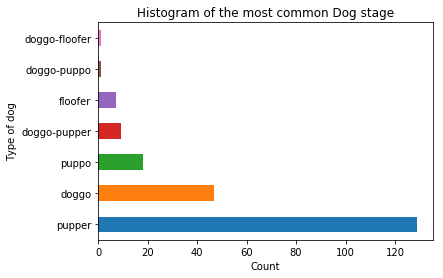

In [442]:


df_dog_stage = df_all_copy.groupby('dog_stage').filter(lambda x: len(x) >= 1)

df_dog_stage['dog_stage'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the most common Dog stage')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');



# Insight(2):
- Retweet and Favorite counts are extremely correlated; each retweeted tweet is very likely to be favorited by the users.


Text(0.5,1,'Retweets and Favorites  Counts Scatter plot')

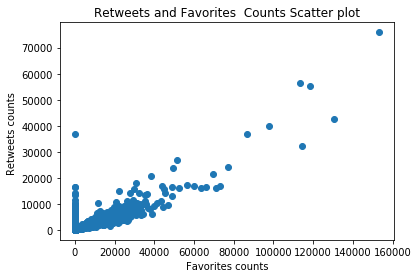

In [430]:
plt.scatter(df_all_copy['favorite_count'], df_all_copy['retweet_count'])
plt.xlabel('Favorites counts')
plt.ylabel('Retweets counts ')
plt.title('Retweets and Favorites  Counts Scatter plot')

# Insight(3):
- “doggo-puppo” is the most preferable dog stage by the users; as this stage has got the highest number of retweets and favorites.


In [431]:
df_all_copy.groupby(['dog_stage']).retweet_count.mean().sort_values(ascending=False)[0:10]

dog_stage
doggo-puppo      17030.000000
doggo            7722.936170 
puppo            6069.777778 
doggo-pupper     5451.333333 
floofer          4249.571429 
doggo-floofer    2989.000000 
pupper           2524.589147 
Name: retweet_count, dtype: float64

In [432]:
df_all_copy.groupby(['dog_stage']).favorite_count.mean().sort_values(ascending=False)[0:10]

dog_stage
doggo-puppo      43761.000000
puppo            22463.333333
doggo            19872.021277
doggo-floofer    15590.000000
floofer          11827.142857
doggo-pupper     10956.222222
pupper           7703.813953 
Name: favorite_count, dtype: float64


# Insight(4):
- “standard_poodle” is the most retweeted dog, while “black-and-tan_coonhound” is the most favorited dog


In [434]:
df_all_copy.groupby(['dog_kind']).retweet_count.mean().sort_values(ascending=False)[0:10]

dog_kind
standard_poodle            15104.400000
Afghan_hound               7615.333333 
black-and-tan_coonhound    7064.000000 
French_bulldog             5371.105263 
Lakeland_terrier           5305.461538 
English_springer           4849.400000 
Eskimo_dog                 4716.055556 
Cardigan                   4598.944444 
Great_Pyrenees             4571.750000 
Tibetan_mastiff            4547.800000 
Name: retweet_count, dtype: float64

In [443]:
df_all_copy.groupby(['dog_kind']).favorite_count.mean().sort_values(ascending=False)[0:5]

dog_kind
black-and-tan_coonhound    30682.000000
French_bulldog             22119.789474
Saluki                     21845.000000
standard_poodle            19032.200000
Leonberg                   18611.500000
Name: favorite_count, dtype: float64